In [2]:
import pandas as pd
import numpy as np
import random
from subprocess import check_output
import os

# for generating pairwise (dis)similarity matrices
import sklearn.neighbors as skn
import sklearn.metrics as skm

import sklearn
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn import datasets
from pandas.plotting import scatter_matrix, parallel_coordinates, andrews_curves

# for clustering models
from sklearn import cluster
import scipy.cluster.hierarchy as hclust
import scipy.stats
from sklearn.neighbors import kneighbors_graph

from IPython import display
from IPython.core.display import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#tslearn tutorials at http://tslearn.readthedocs.io

import tslearn

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.preprocessing import TimeSeriesScalerMinMax

from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation, OneD_SymbolicAggregateApproximation

from tslearn.clustering import TimeSeriesKMeans

seed = 1
np.random.seed(seed)

In [4]:
# loading the cleaned stock data from 'Final Project - Pre-processing Data 2016 only.ipynb'
df_stocks_2016 = pd.read_csv('./stocks_clean_2016.csv', sep=',', index_col=0)

In [5]:
df_stocks_2016.head()

,a,aa,aaap,aaba,aac,aal,aamc,aame,aan,aaoi,...,znga,znh,zoes,zsan,zto,ztr,zts,zumz,zx,zyne
2016-01-01,39.979,21.365,30.67,31.40,18.52,40.111,20.01,4.7960,22.537,16.29,...,2.58,33.820,28.27,2.3801,16.57,9.5330,46.546,15.16,0.7900,9.67
2016-01-04,39.979,21.365,30.67,31.40,18.52,40.111,20.01,4.7960,22.537,16.29,...,2.58,33.820,28.27,2.3801,16.57,9.5330,46.546,15.16,0.7900,9.67
2016-01-05,39.842,20.398,30.88,32.20,19.46,39.730,19.92,4.5284,22.974,16.08,...,2.56,34.090,27.84,2.5105,16.57,9.5420,47.273,15.31,0.7601,9.25
2016-01-06,40.018,18.946,29.96,32.16,19.01,40.426,19.97,4.6573,21.236,16.05,...,2.57,33.994,26.99,2.4300,16.57,9.4535,47.283,15.08,0.7699,9.10
2016-01-07,38.317,18.197,29.65,30.16,18.20,39.660,15.48,4.5384,20.539,15.29,...,2.48,32.435,26.29,2.4400,16.57,9.3428,45.846,16.81,0.7900,8.75


In [6]:
df_stocks_2016.shape

(261, 6399)

In [7]:
df_transposed = df_stocks_2016.T

In [8]:
df_transposed.shape

(6399, 261)

In [9]:
df_transposed.head()

,2016-01-01,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-11,2016-01-12,2016-01-13,2016-01-14,...,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30
a,39.979,39.979,39.842,40.018,38.317,37.916,37.278,37.523,36.216,36.952,...,44.996,45.768,45.598,45.53,45.758,45.758,46.065,45.282,45.334,45.254
aa,21.365,21.365,20.398,18.946,18.197,17.757,17.603,16.018,15.688,15.931,...,29.290,30.160,30.430,29.75,29.710,29.710,29.650,29.430,28.890,28.080
aaap,30.670,30.670,30.880,29.960,29.650,28.000,26.790,24.710,26.090,25.240,...,26.270,26.210,24.680,23.72,24.070,24.070,26.290,26.300,26.520,26.760
aaba,31.400,31.400,32.200,32.160,30.160,30.630,30.170,30.690,29.440,30.320,...,38.420,39.160,39.150,38.50,38.660,38.660,38.920,38.730,38.640,38.670
aac,18.520,18.520,19.460,19.010,18.200,18.110,17.460,16.900,16.240,17.270,...,7.640,7.470,7.490,7.34,7.300,7.300,7.160,7.000,6.860,7.240


In [10]:
df_transposed_100 = df_transposed.sample(n=100, replace=False)

In [11]:
df_transposed_100.head()

,2016-01-01,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-11,2016-01-12,2016-01-13,2016-01-14,...,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30
nwsa,12.790,12.790,12.365,12.306,12.025,12.181,11.822,12.035,11.803,12.306,...,11.548,11.469,11.538,11.5580,11.548,11.548,11.725,11.509,11.479,11.2820
ngls_a,19.670,19.670,19.850,19.170,18.800,19.100,18.550,17.930,16.990,17.860,...,27.105,27.340,27.500,27.6343,27.780,27.780,27.690,27.250,27.250,27.5117
ncmi,13.259,13.259,13.320,13.311,12.947,12.851,13.086,12.791,12.460,12.678,...,14.136,13.371,13.556,13.5460,13.481,13.481,13.481,13.416,13.500,13.5830
umbf,44.172,44.172,43.998,43.882,42.509,42.022,42.209,42.169,39.920,40.019,...,75.176,75.206,74.959,75.5910,75.601,75.601,76.412,76.412,76.808,76.2840
mgu,16.835,16.835,16.765,16.526,16.186,15.814,15.621,15.529,15.183,15.359,...,18.908,19.051,18.976,18.9570,19.051,19.051,19.024,18.632,18.814,18.8410


In [12]:
df_transposed_100.shape

(100, 261)

In [13]:
df_matrix = df_transposed_100.as_matrix()

In [14]:
type(df_matrix)

numpy.ndarray

In [15]:
df_matrix

array([[ 12.79  ,  12.79  ,  12.365 , ...,  11.509 ,  11.479 ,  11.282 ],
       [ 19.67  ,  19.67  ,  19.85  , ...,  27.25  ,  27.25  ,  27.5117],
       [ 13.259 ,  13.259 ,  13.32  , ...,  13.416 ,  13.5   ,  13.583 ],
       ..., 
       [ 14.311 ,  14.311 ,  14.295 , ...,  15.318 ,  15.315 ,  15.338 ],
       [ 21.619 ,  21.619 ,  21.52  , ...,  24.544 ,  24.167 ,  24.167 ],
       [ 10.71  ,  10.71  ,  10.71  , ...,  12.206 ,  12.234 ,  12.28  ]])

In [16]:
# 100 randomly chosen tickers and 261 trading days in 2016
df_matrix.shape

(100, 261)

In [17]:
# use tslearn package function "TimeSeriesScalerMeanVariance" to normalize the data to a mean of
# 0 and standard deviation of 1, and also change into a 3-dimensional array which tslearn classes and
# functions require if more than one time series.
scaler = TimeSeriesScalerMeanVariance()
df_scaled = scaler.fit_transform(df_matrix)

In [18]:
df_scaled[0]

array([[ 0.74840684],
       [ 0.74840684],
       [ 0.29309489],
       [ 0.22988687],
       [-0.07115468],
       [ 0.09597159],
       [-0.2886331 ],
       [-0.06044146],
       [-0.30898822],
       [ 0.22988687],
       [ 0.02312168],
       [ 0.02312168],
       [-0.14293327],
       [-0.35076979],
       [-0.12150682],
       [ 0.22024497],
       [ 0.01240846],
       [ 0.32309191],
       [ 0.22024497],
       [ 0.36487348],
       [ 0.49986008],
       [ 0.22024497],
       [-0.38183813],
       [-0.25756475],
       [-0.2886331 ],
       [-1.43923319],
       [-1.99953473],
       [-2.07238464],
       [-1.95882449],
       [-2.166661  ],
       [-1.80348276],
       [-1.80348276],
       [-1.60528814],
       [-1.54315145],
       [-1.69849318],
       [-1.62671459],
       [-1.43923319],
       [-1.65885426],
       [-1.76170119],
       [-1.67813806],
       [-1.62671459],
       [-1.72956152],
       [-1.78312764],
       [-1.65885426],
       [-1.63742781],
       [-1

In [19]:
# 100 time series , over a size of 261 days, with 1-dimension
df_scaled.shape

(100, 261, 1)

In [20]:
# store the size of the time series, which is 261 trading days for the year 2016
sz = df_scaled.shape[1]
sz

261

In [20]:
#Try Euclidean K-means clustering first
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
clusters_euclid = km.fit_predict(df_scaled)

Euclidean k-means
170.356 --> 115.493 --> 114.416 --> 114.281 --> 114.281 --> 


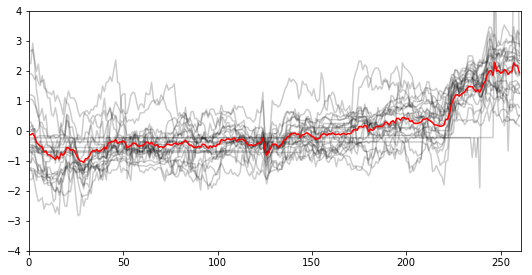

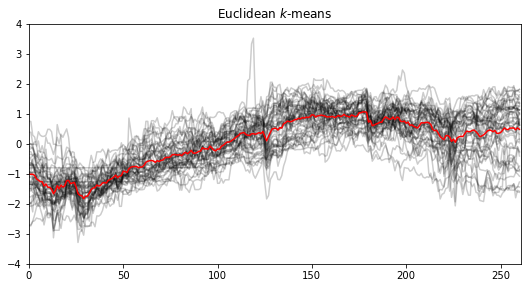

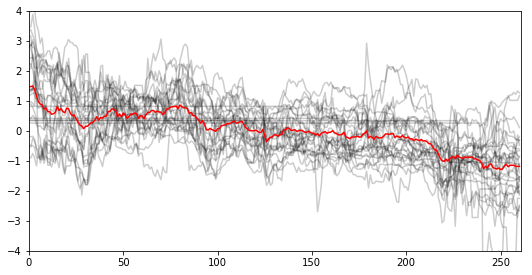

In [25]:
# plot the 3 clusters for Euclidean distance
plt.figure()
for yi in range(3):
    plt.figure(figsize=(30,15))
    plt.subplot(3, 3, yi + 1)
    for xx in df_scaled[clusters_euclid == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Euclidean $k$-means")
plt.show()

In [27]:
# Euclidean clustering labels
euclid_labels = km.labels_
print(euclid_labels)

[1 1 0 0 1 0 0 1 0 0 2 1 0 1 2 1 2 1 1 0 2 2 1 1 1 1 1 0 2 2 1 0 2 1 2 2 2
 0 1 1 2 1 2 1 2 2 0 1 1 1 0 2 1 2 1 2 1 1 0 2 0 2 1 2 0 1 0 0 1 1 1 1 2 1
 1 1 1 2 1 1 1 2 2 0 0 1 0 0 1 1 0 1 0 2 2 0 2 1 1 1]


In [50]:
euclid_labels.shape

(100,)

In [28]:
# another way of calling the clusters
clusters_euclid

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 2, 1,
       1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 1, 2, 2,
       0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 2, 2, 0, 2, 1, 1, 1])

(array([ 25.,   0.,   0.,   0.,   0.,  47.,   0.,   0.,   0.,  28.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

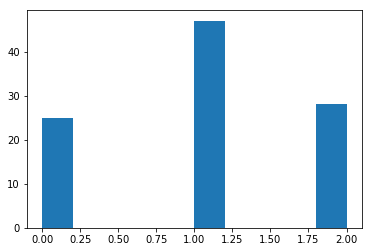

In [31]:
# plot histogram of cluster distribution for Euclidean distance K-means
plt.hist(clusters_euclid)

In [34]:
km.cluster_centers_.shape

(3, 261, 1)

In [48]:
stock_names_100 = df_transposed_100.index.values
print(stock_names_100)

['nwsa' 'ngls_a' 'ncmi' 'umbf' 'mgu' 'wbib' 'pcti' 'amn' 'evstc' 'wdc'
 'ohai' 'fet' 'nsit' 'cuo' 'nvta' 'ulti' 'jmu' 'dwsn' 'afst' 'pi' 'fox'
 'gogo' 'mic' 'mxl' 'ntes' 'gpt' 'xec' 'sxcp' 'afh' 'vtvt' 'arr_a' 'indf'
 'wdrw' 'glt' 'iipr' 'gam_b' 'gpro' 'fmbh' 'roic' 'apu' 'jll' 'geh' 'evar'
 'nxq' 'gts' 'dmpi' 'svvc' 'ms_f' 'dwpp' 'tnet' 'lvhb' 'ntwk' 'cms' 'cldx'
 'mmsi' 'ssw_g' 'pe' 'jmt' 'cac' 'tbi' 'cstm' 'cnce' 'lmha' 'oii' 'pb'
 'flow' 'carb' 'met' 'nwl' 'ctib' 'nzf' 'agm_c' 'csbr' 'aljj' 'hd' 'wvvi'
 'sfr' 'jnp' 'blj' 'aem' 'csod' 'rsls' 'rexr_a' 'lark' 'sna' 'uonek' 'lvhe'
 'ggg' 'amrn' 'dltr' 'rlh' 'nhs' 'pbip' 'wfc_p' 'eemo' 'egrx' 'cfrx' 'gfy'
 'bdl' 'wea']


In [51]:
stock_names_100.shape

(100,)

In [99]:
df_euclid_clusters = pd.DataFrame({'Stocks': stock_names_100, 'Clusters': euclid_labels})
df_euclid_clusters.head(10)

,Clusters,Stocks
0,1,nwsa
1,1,ngls_a
2,0,ncmi
3,0,umbf
4,1,mgu
5,0,wbib
6,0,pcti
7,1,amn
8,0,evstc
9,0,wdc


In [22]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3, n_init=2, metric="dtw", verbose=True, max_iter_barycenter=5, random_state=seed)
y_pred = dba_km.fit_predict(df_scaled)

DBA k-means
Init 1
62.904 --> 27.101 --> 25.451 --> 25.073 --> 24.996 --> 24.975 --> 24.966 --> 24.965 --> 24.965 --> 


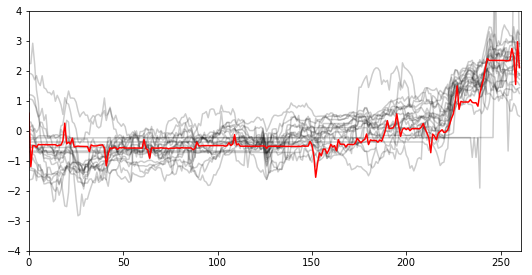

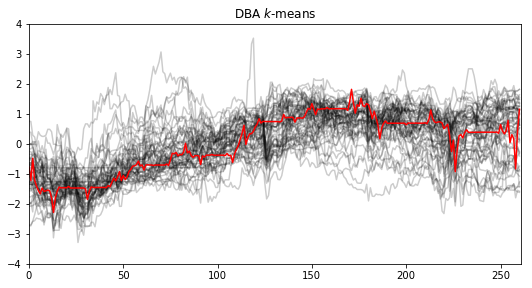

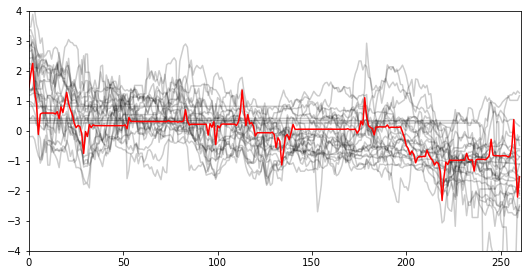

In [23]:
# plot DBA-k-means clusters
for yi in range(3):
    plt.figure(figsize=(30,15))
    plt.subplot(3, 3, 4 + yi)
    for xx in df_scaled[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("DBA $k$-means")

In [35]:
# Get the DBA DTW cluster labels
dba_dtw_labels = dba_km.labels_
print(dba_dtw_labels)

[1 1 1 0 1 0 1 1 0 0 2 1 0 1 1 1 2 1 1 0 1 2 1 1 1 1 1 0 2 2 1 0 2 1 2 2 2
 0 1 1 2 1 2 1 1 2 0 1 1 0 0 2 1 2 1 2 1 1 0 2 2 2 1 2 0 1 0 0 1 1 1 1 2 1
 1 1 1 2 1 1 1 2 2 0 0 1 0 1 1 1 1 1 0 2 2 0 2 1 1 1]


(array([ 21.,   0.,   0.,   0.,   0.,  53.,   0.,   0.,   0.,  26.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

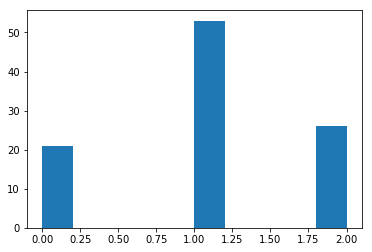

In [36]:
plt.hist(dba_dtw_labels)

In [24]:
# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3, metric="softdtw", metric_params={"gamma_sdtw": .01},
                           verbose=True, random_state=seed)
y_pred = sdtw_km.fit_predict(df_scaled)


Soft-DTW k-means
7297.515 --> 993.354 --> 996.065 --> 981.540 --> 1035.149 --> 967.449 --> 960.556 --> 1048.610 --> 1051.976 --> 1059.793 --> 1059.793 --> 


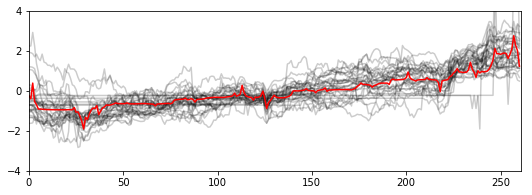

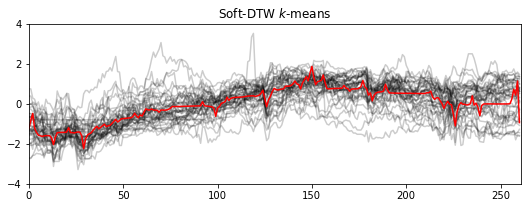

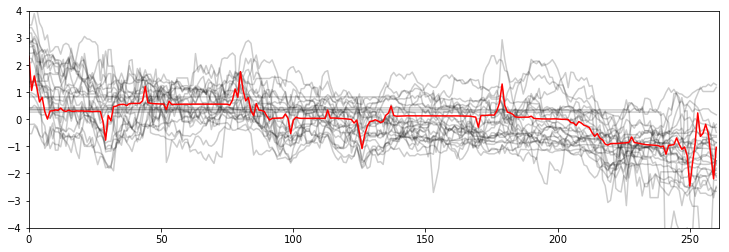

In [26]:
# plot Soft-DTW-k-means
for yi in range(3):
    plt.figure(figsize=(30,10))
    plt.subplot(3, 3, 7 + yi)
    for xx in df_scaled[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

In [37]:
# Get the soft DTW cluster labels
soft_dtw_labels = sdtw_km.labels_
print(soft_dtw_labels)

[1 1 1 0 1 0 1 1 0 0 2 0 0 0 1 1 2 1 1 0 1 2 0 1 0 1 1 0 2 2 1 0 2 0 2 2 2
 0 1 1 2 1 2 1 2 2 0 1 1 0 0 2 1 2 0 2 0 0 0 2 2 2 1 2 0 1 0 0 1 1 1 1 2 1
 1 1 1 2 1 1 1 2 2 0 0 1 0 1 0 1 1 1 0 2 2 0 2 0 0 1]


(array([ 32.,   0.,   0.,   0.,   0.,  41.,   0.,   0.,   0.,  27.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

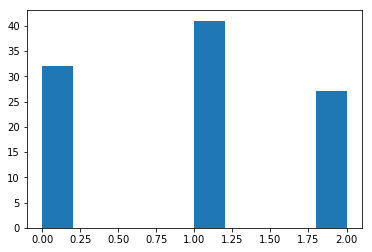

In [38]:
plt.hist(soft_dtw_labels)

In [53]:
# read in csv with stock symbols, names, and industry
# from http://www.nasdaq.com/screening/companies-by-industry.aspx?exchange=NASDAQ&render=download
df_ticker = pd.read_csv('./companylist.csv', sep=',', index_col=0)

In [54]:
df_ticker.head()

,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9
Symbol,,,,,,,,,
PIH,"1347 Property Insurance Holdings, Inc.",7.2,4.309032e+07,n/a,2014,Finance,Property-Casualty Insurers,http://www.nasdaq.com/symbol/pih,NaN
TURN,180 Degree Capital Corp.,1.99,6.193191e+07,n/a,n/a,Finance,Finance/Investors Services,http://www.nasdaq.com/symbol/turn,NaN
FLWS,"1-800 FLOWERS.COM, Inc.",10.75,6.947130e+08,n/a,1999,Consumer Services,Other Specialty Stores,http://www.nasdaq.com/symbol/flws,NaN
FCCY,1st Constitution Bancorp (NJ),18.45,1.489497e+08,n/a,n/a,Finance,Savings Institutions,http://www.nasdaq.com/symbol/fccy,NaN
SRCE,1st Source Corporation,49.31,1.278911e+09,n/a,n/a,Finance,Major Banks,http://www.nasdaq.com/symbol/srce,NaN


In [55]:
df_ticker.shape

(3281, 9)

In [63]:
# change ticker symbol to lower case to inner join merge with cluster dataframe
df_ticker.index = df_ticker.index.str.lower()

In [64]:
df_ticker.index

Index(['pih', 'turn', 'flws', 'fccy', 'srce', 'vnet', 'twou', 'jobs', 'cafd',
       'eght',
       ...
       'zionw', 'zionz', 'ziop', 'zixi', 'zkin', 'zgnx', 'zsan', 'zumz',
       'zyne', 'znga'],
      dtype='object', name='Symbol', length=3281)

In [66]:
df_ticker.head()

,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9
Symbol,,,,,,,,,
pih,"1347 Property Insurance Holdings, Inc.",7.2,4.309032e+07,n/a,2014,Finance,Property-Casualty Insurers,http://www.nasdaq.com/symbol/pih,NaN
turn,180 Degree Capital Corp.,1.99,6.193191e+07,n/a,n/a,Finance,Finance/Investors Services,http://www.nasdaq.com/symbol/turn,NaN
flws,"1-800 FLOWERS.COM, Inc.",10.75,6.947130e+08,n/a,1999,Consumer Services,Other Specialty Stores,http://www.nasdaq.com/symbol/flws,NaN
fccy,1st Constitution Bancorp (NJ),18.45,1.489497e+08,n/a,n/a,Finance,Savings Institutions,http://www.nasdaq.com/symbol/fccy,NaN
srce,1st Source Corporation,49.31,1.278911e+09,n/a,n/a,Finance,Major Banks,http://www.nasdaq.com/symbol/srce,NaN


In [71]:
# Add a new column that is the ticker symbols to join/merge with cluster data frame
df_ticker['Symbol'] = df_ticker.index.values

,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9,Symbol
Symbol,,,,,,,,,,
pih,"1347 Property Insurance Holdings, Inc.",7.2,4.309032e+07,n/a,2014,Finance,Property-Casualty Insurers,http://www.nasdaq.com/symbol/pih,NaN,pih
turn,180 Degree Capital Corp.,1.99,6.193191e+07,n/a,n/a,Finance,Finance/Investors Services,http://www.nasdaq.com/symbol/turn,NaN,turn
flws,"1-800 FLOWERS.COM, Inc.",10.75,6.947130e+08,n/a,1999,Consumer Services,Other Specialty Stores,http://www.nasdaq.com/symbol/flws,NaN,flws
fccy,1st Constitution Bancorp (NJ),18.45,1.489497e+08,n/a,n/a,Finance,Savings Institutions,http://www.nasdaq.com/symbol/fccy,NaN,fccy
srce,1st Source Corporation,49.31,1.278911e+09,n/a,n/a,Finance,Major Banks,http://www.nasdaq.com/symbol/srce,NaN,srce


In [80]:
df_euclid_merge = df_euclid_clusters.merge(df_ticker, left_on='Stocks', right_on='Symbol', how='inner')
df_euclid_merge.head()

,Clusters,Stocks,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9,Symbol
0,1,nwsa,News Corporation,16.22,9.450126e+09,n/a,n/a,Consumer Services,Newspapers/Magazines,http://www.nasdaq.com/symbol/nwsa,NaN,nwsa
1,0,ncmi,"National CineMedia, Inc.",7,5.495103e+08,n/a,2007,Consumer Services,Advertising,http://www.nasdaq.com/symbol/ncmi,NaN,ncmi
2,0,umbf,UMB Financial Corporation,71.71,3.575982e+09,n/a,n/a,Finance,Major Banks,http://www.nasdaq.com/symbol/umbf,NaN,umbf
3,0,pcti,"PC-Tel, Inc.",7.43,1.317153e+08,n/a,1999,Technology,Radio And Television Broadcasting And Communic...,http://www.nasdaq.com/symbol/pcti,NaN,pcti
4,0,evstc,Eaton Vance NextShares Trust,100.02,0.000000e+00,n/a,n/a,n/a,n/a,http://www.nasdaq.com/symbol/evstc,NaN,evstc


In [81]:
df_euclid_merge.shape

(43, 12)

In [82]:
df_euclid_merge

,Clusters,Stocks,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9,Symbol
0,1,nwsa,News Corporation,16.22,9.450126e+09,n/a,n/a,Consumer Services,Newspapers/Magazines,http://www.nasdaq.com/symbol/nwsa,NaN,nwsa
1,0,ncmi,"National CineMedia, Inc.",7,5.495103e+08,n/a,2007,Consumer Services,Advertising,http://www.nasdaq.com/symbol/ncmi,NaN,ncmi
2,0,umbf,UMB Financial Corporation,71.71,3.575982e+09,n/a,n/a,Finance,Major Banks,http://www.nasdaq.com/symbol/umbf,NaN,umbf
3,0,pcti,"PC-Tel, Inc.",7.43,1.317153e+08,n/a,1999,Technology,Radio And Television Broadcasting And Communic...,http://www.nasdaq.com/symbol/pcti,NaN,pcti
4,0,evstc,Eaton Vance NextShares Trust,100.02,0.000000e+00,n/a,n/a,n/a,n/a,http://www.nasdaq.com/symbol/evstc,NaN,evstc
5,0,wdc,Western Digital Corporation,82.64,2.444381e+10,n/a,n/a,Technology,Electronic Components,http://www.nasdaq.com/symbol/wdc,NaN,wdc
6,2,ohai,OHA Investment Corporation,1.2,2.420687e+07,n/a,n/a,n/a,n/a,http://www.nasdaq.com/symbol/ohai,NaN,ohai
7,0,nsit,"Insight Enterprises, Inc.",36.54,1.307849e+09,n/a,1995,Consumer Services,Catalog/Specialty Distribution,http://www.nasdaq.com/symbol/nsit,NaN,nsit
8,1,ulti,"The Ultimate Software Group, Inc.",215.63,6.442117e+09,n/a,1998,Technology,Computer Software: Prepackaged Software,http://www.nasdaq.com/symbol/ulti,NaN,ulti
9,2,jmu,JMU Limited,0.9306,1.620223e+07,17410521,2015,Technology,EDP Services,http://www.nasdaq.com/symbol/jmu,NaN,jmu


In [86]:
df_euclid_merge.drop(['ADR TSO','IPOyear','LastSale'], axis=1, inplace=True)

In [89]:
df_euclid_merge.drop(['Unnamed: 9'], axis=1, inplace=True)

In [90]:
df_euclid_merge.head()

,Clusters,Stocks,Name,MarketCap,Sector,Industry,Summary Quote,Symbol
0,1,nwsa,News Corporation,9.450126e+09,Consumer Services,Newspapers/Magazines,http://www.nasdaq.com/symbol/nwsa,nwsa
1,0,ncmi,"National CineMedia, Inc.",5.495103e+08,Consumer Services,Advertising,http://www.nasdaq.com/symbol/ncmi,ncmi
2,0,umbf,UMB Financial Corporation,3.575982e+09,Finance,Major Banks,http://www.nasdaq.com/symbol/umbf,umbf
3,0,pcti,"PC-Tel, Inc.",1.317153e+08,Technology,Radio And Television Broadcasting And Communic...,http://www.nasdaq.com/symbol/pcti,pcti
4,0,evstc,Eaton Vance NextShares Trust,0.000000e+00,n/a,n/a,http://www.nasdaq.com/symbol/evstc,evstc


In [94]:
df_euclid_merge.groupby(['Clusters','Sector']).size()

Clusters  Sector               
0         Capital Goods            1
          Consumer Services        2
          Finance                  5
          Health Care              1
          Technology               3
          n/a                      2
1         Basic Industries         1
          Consumer Non-Durables    1
          Consumer Services        4
          Energy                   1
          Health Care              2
          Miscellaneous            2
          Technology               2
          n/a                      1
2         Consumer Services        2
          Finance                  1
          Health Care              8
          Miscellaneous            1
          Technology               2
          n/a                      1
dtype: int64

In [96]:
df_euclid_merge.groupby(['Sector','Clusters']).size()

Sector                 Clusters
Basic Industries       1           1
Capital Goods          0           1
Consumer Non-Durables  1           1
Consumer Services      0           2
                       1           4
                       2           2
Energy                 1           1
Finance                0           5
                       2           1
Health Care            0           1
                       1           2
                       2           8
Miscellaneous          1           2
                       2           1
Technology             0           3
                       1           2
                       2           2
n/a                    0           2
                       1           1
                       2           1
dtype: int64

In [97]:
df_euclid_merge.groupby(['Clusters','Sector']).mean()

MarketCap
Clusters Sector                             
0        Capital Goods          4.856041e+08
         Consumer Services      9.286794e+08
         Finance                9.986126e+08
         Health Care            8.308360e+08
         Technology             8.410761e+09
         n/a                    3.195200e+07
1        Basic Industries       1.389821e+07
         Consumer Non-Durables  4.105715e+07
         Consumer Services      9.122036e+09
         Energy                 1.014231e+08
         Health Care            1.522082e+09
         Miscellaneous          1.357820e+10
         Technology             4.225068e+09
         n/a                    2.985156e+07
2        Consumer Services      3.216015e+10
         Finance                2.207634e+08
         Health Care            1.684132e+08
         Miscellaneous          1.144319e+09
         Technology             3.388398e+07
         n/a                    2.420687e+07

In [100]:
df_euclid_merge.groupby(['Sector','Clusters']).mean()

MarketCap
Sector                Clusters              
Basic Industries      1         1.389821e+07
Capital Goods         0         4.856041e+08
Consumer Non-Durables 1         4.105715e+07
Consumer Services     0         9.286794e+08
                      1         9.122036e+09
                      2         3.216015e+10
Energy                1         1.014231e+08
Finance               0         9.986126e+08
                      2         2.207634e+08
Health Care           0         8.308360e+08
                      1         1.522082e+09
                      2         1.684132e+08
Miscellaneous         1         1.357820e+10
                      2         1.144319e+09
Technology            0         8.410761e+09
                      1         4.225068e+09
                      2         3.388398e+07
n/a                   0         3.195200e+07
                      1         2.985156e+07
                      2         2.420687e+07

In [121]:
df_euclid_merge.groupby(['Clusters','Industry']).mean()

MarketCap
Clusters Industry                                                        
0        Advertising                                         5.495103e+08
         Banks                                               1.643082e+08
         Catalog/Specialty Distribution                      1.307849e+09
         EDP Services                                        6.567608e+08
         Electronic Components                               2.444381e+10
         Industrial Machinery/Components                     4.856041e+08
         Major Banks                                         1.207189e+09
         Major Pharmaceuticals                               8.308360e+08
         Radio And Television Broadcasting And Communica...  1.317153e+08
         n/a                                                 3.195200e+07
1        Beverages (Production/Distribution)                 4.105715e+07
         Broadcasting                                        7.515625e+07
         Business Services                                   1.357820e+10
         Computer Software: Prepackaged Software             4.225068e+09
         Department/Specialty Retail Stores                  2.481215e+10
         Major Pharmaceuticals                               8.655339e+08
         Medical/Dental Instruments                          2.178629e+09
         Newspapers/Magazines                                9.450126e+09
         Oil & Gas Production                                1.014231e+08
         Real Estate Investment Trusts                       2.150712e+09
         Specialty Chemicals                                 1.389821e+07
         n/a                                                 2.985156e+07
2        Biotechnology: Biological Products (No Diagnost...  4.383400e+07
         Biotechnology: Electromedical & Electrotherapeu...  2.888589e+07
         Biotechnology: In Vitro & In Vivo Diagnostic Su...  3.970772e+08
         Computer Software: Prepackaged Software             5.156574e+07
         EDP Services                                        1.620223e+07
         Industrial Machinery/Components                     1.144319e+09
         Major Pharmaceuticals                               1.755018e+08
         Property-Casualty Insurers                          2.207634e+08
         Telecommunications Equipment                        9.267327e+08
         Television Services                                 6.339357e+10
         n/a                                                 2.420687e+07

In [122]:
df_euclid_merge.groupby(['Industry','Clusters']).mean()

,,MarketCap
Industry,Clusters,
Advertising,0,5.495103e+08
Banks,0,1.643082e+08
Beverages (Production/Distribution),1,4.105715e+07
Biotechnology: Biological Products (No Diagnostic Substances),2,4.383400e+07
Biotechnology: Electromedical & Electrotherapeutic Apparatus,2,2.888589e+07
Biotechnology: In Vitro & In Vivo Diagnostic Substances,2,3.970772e+08
Broadcasting,1,7.515625e+07
Business Services,1,1.357820e+10
Catalog/Specialty Distribution,0,1.307849e+09


In [101]:
#Try Euclidean K-means clustering with 9 clusters (for the 9 industries)
print("Euclidean k-means")
km_9 = TimeSeriesKMeans(n_clusters=9, verbose=True, random_state=seed)
clusters_euclid_9 = km_9.fit_predict(df_scaled)

Euclidean k-means
108.015 --> 76.154 --> 75.201 --> 75.106 --> 74.963 --> 74.901 --> 74.901 --> 


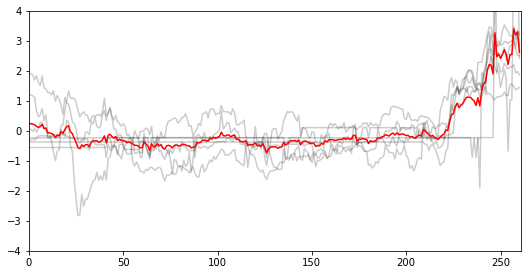

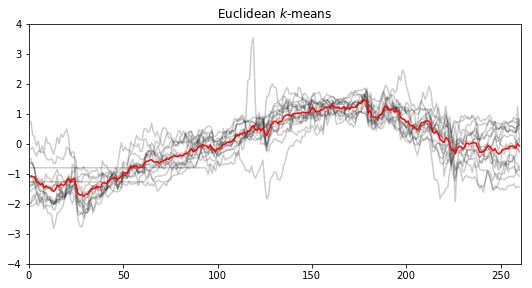

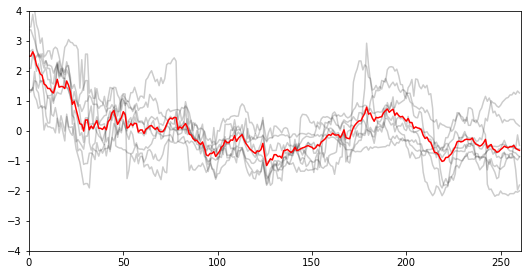

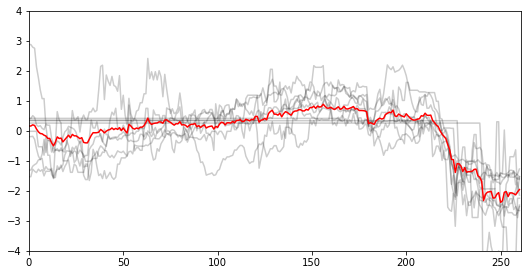

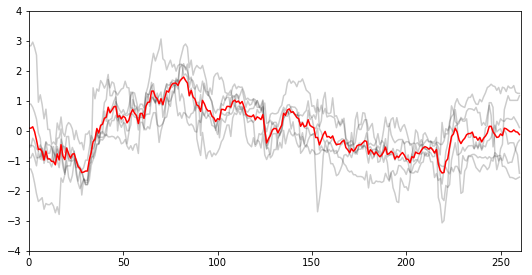

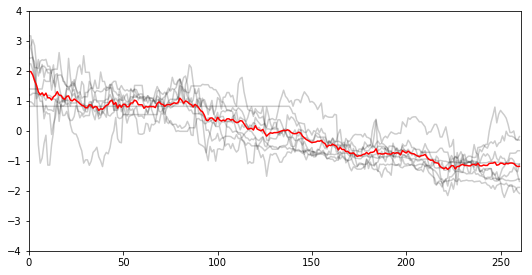

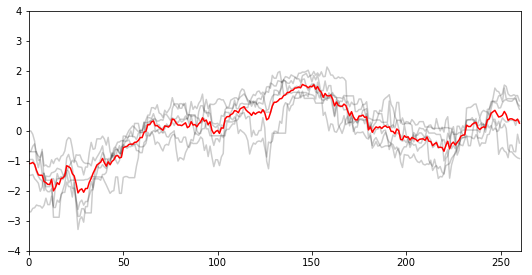

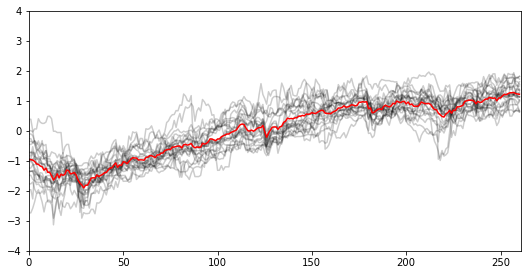

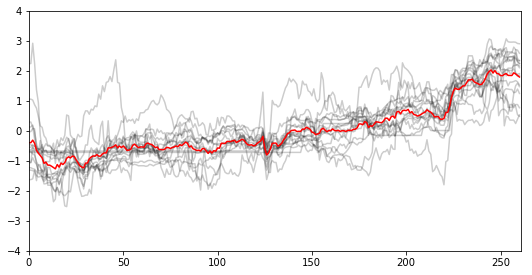

In [105]:
# plot the 9 clusters for Euclidean distance
plt.figure()
for yi in range(9):
    plt.figure(figsize=(30,15))
    plt.subplot(3, 3, yi + 1)
    for xx in df_scaled[clusters_euclid_9 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km_9.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Euclidean $k$-means")
plt.show()

In [108]:
# Then we can use the elbow method to assess the ideal K. 

# This function definition is taken from the below link
# https://github.com/analyticalmonk/KMeans_elbow/blob/master/kmeans_elbow.ipynb

# Elbow criterion
def elbow_plot(data, maxK=10, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(3, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = cluster.KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = cluster.KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


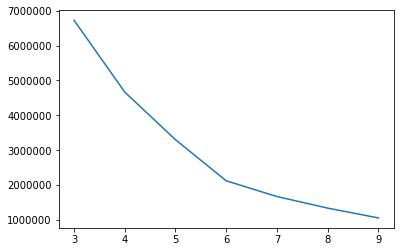

In [117]:
# Call the above function setting the maxK to the result that we got from the empirical method (~ 25 here)
elbow_plot(df_transposed_100, maxK=10)

In [119]:
#Try Euclidean K-means clustering with 6 clusters (for the 6 in the "elbow" plot)
print("Euclidean k-means")
km_6 = TimeSeriesKMeans(n_clusters=6, verbose=True, random_state=seed)
clusters_euclid_6 = km_6.fit_predict(df_scaled)

Euclidean k-means
126.721 --> 88.899 --> 88.221 --> 87.786 --> 87.786 --> 


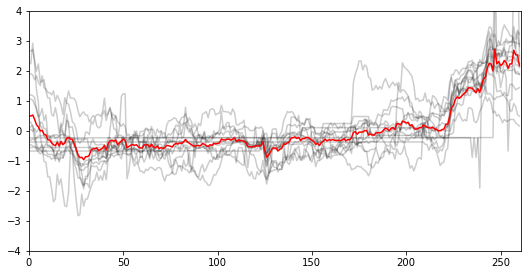

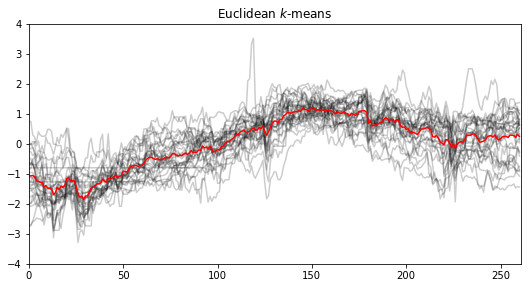

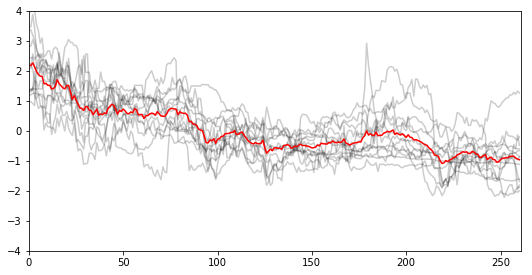

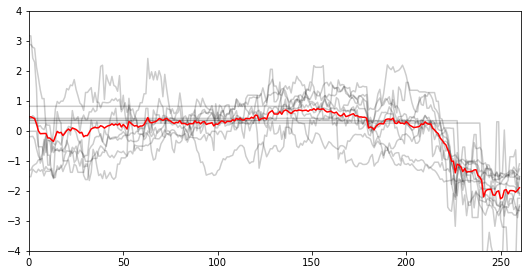

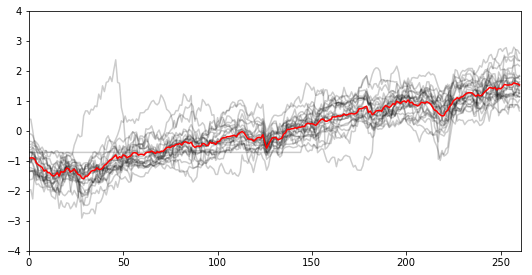

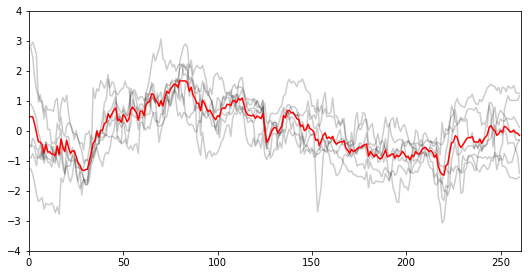

In [120]:
# plot the 6 clusters for Euclidean distance
plt.figure()
for yi in range(6):
    plt.figure(figsize=(30,15))
    plt.subplot(3, 3, yi + 1)
    for xx in df_scaled[clusters_euclid_6 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km_6.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Euclidean $k$-means")
plt.show()

In [22]:
# DBA-k-means for K=6 (from elbow plot)
print("DBA k-means")
dba_km_6 = TimeSeriesKMeans(n_clusters=6, n_init=2, metric="dtw", verbose=True, max_iter_barycenter=10, random_state=seed)
dba_clusters_6 = dba_km_6.fit_predict(df_scaled)

DBA k-means
Init 1
38.537 --> 19.860 --> 19.117 --> 18.899 --> 18.828 --> 18.754 --> 18.617 --> 18.502 --> 18.502 --> 18.502 --> 


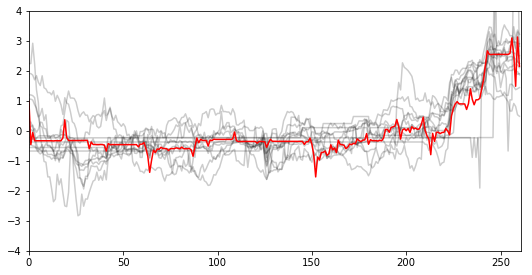

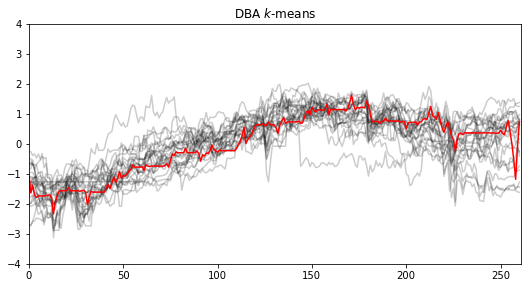

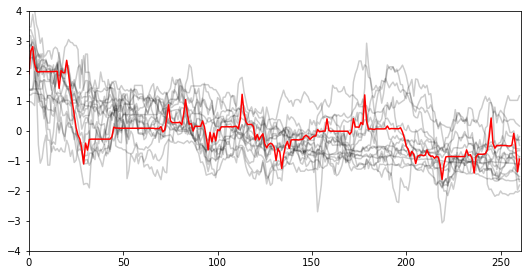

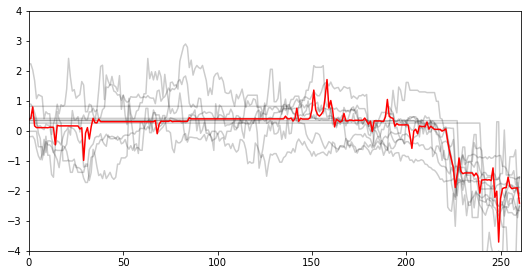

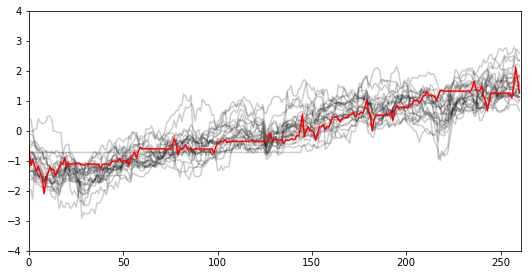

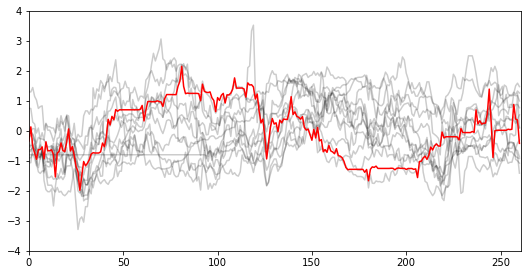

In [23]:
# plot the 6 DBA-k-means clusters
for yi in range(6):
    plt.figure(figsize=(30,15))
    plt.subplot(3, 3, 4 + yi)
    for xx in df_scaled[dba_clusters_6 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km_6.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("DBA $k$-means")

In [24]:
# Soft-DTW-k-means for K=6
print("Soft-DTW k-means")
sdtw_km_6 = TimeSeriesKMeans(n_clusters=6, metric="softdtw", metric_params={"gamma_sdtw": .01},
                           verbose=True, random_state=seed)
clusters_soft_6 = sdtw_km_6.fit_predict(df_scaled)

Soft-DTW k-means
2504.581 --> 566.163 --> 523.013 --> 529.802 --> 529.802 --> 


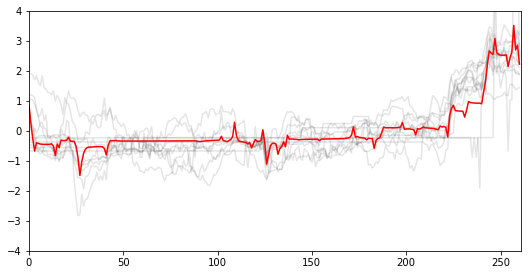

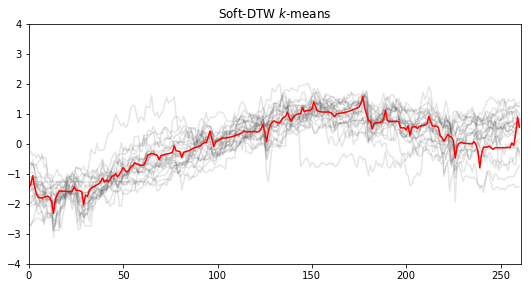

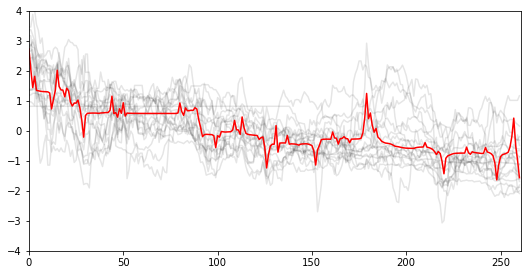

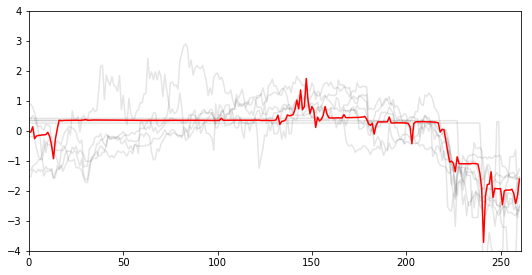

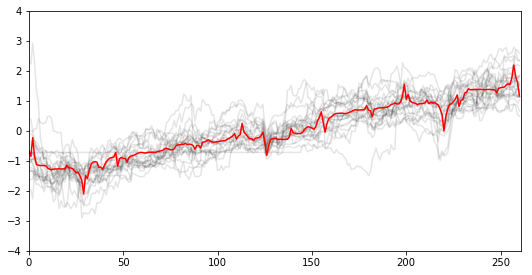

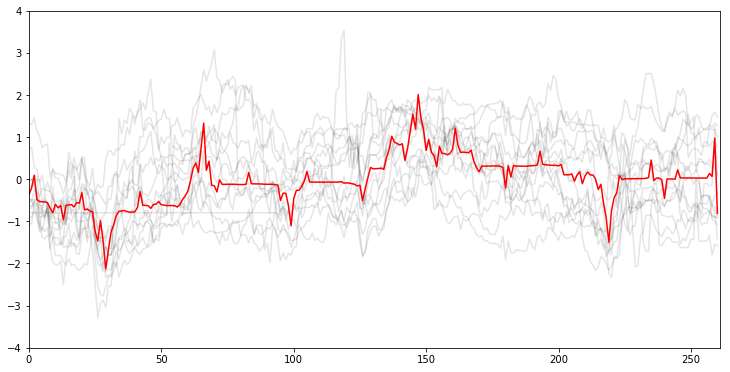

In [27]:
# plot the 6 Soft-DTW-k-means clusters
for yi in range(6):
    plt.figure(figsize=(30,15))
    plt.subplot(3, 3, 3 + yi)
    for xx in df_scaled[clusters_soft_6 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.1)
    plt.plot(sdtw_km_6.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

In [159]:
# read in csv with stock symbols, names, and industry
# from http://www.nasdaq.com/screening/companies-by-industry.aspx?exchange=NYSE&render=download
df_ticker_2 = pd.read_csv('./companylist2.csv', sep=',', index_col=0)

In [160]:
df_ticker_2.head()

,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9
Symbol,,,,,,,,,
DDD,3D Systems Corporation,10,1.138623e+09,n/a,n/a,Technology,Computer Software: Prepackaged Software,http://www.nasdaq.com/symbol/ddd,NaN
MMM,3M Company,238.08,1.418024e+11,n/a,n/a,Health Care,Medical/Dental Instruments,http://www.nasdaq.com/symbol/mmm,NaN
WBAI,500.com Limited,10.22,4.170293e+08,n/a,2013,Consumer Services,Services-Misc. Amusement & Recreation,http://www.nasdaq.com/symbol/wbai,NaN
WUBA,58.com Inc.,69.11,1.012532e+10,n/a,2013,Technology,"Computer Software: Programming, Data Processing",http://www.nasdaq.com/symbol/wuba,NaN
EGHT,8x8 Inc,14,1.287335e+09,n/a,n/a,Public Utilities,Telecommunications Equipment,http://www.nasdaq.com/symbol/eght,NaN


In [161]:
# change ticker symbol to lower case to inner join merge with cluster dataframe
df_ticker_2.index = df_ticker_2.index.str.lower()

In [162]:
# Add a new column that is the ticker symbols to join/merge with cluster data frame
df_ticker_2['Symbol'] = df_ticker_2.index.values

In [163]:
df_ticker_2.shape

(3147, 10)

In [164]:
# merge the two ticker data frames to see how many duplicate rows there are (same symbol)
df_ticker_merge = pd.merge(df_ticker, df_ticker_2, on='Symbol', how='inner')
df_ticker_merge.shape

(6, 19)

In [165]:
# There are 6 duplicate tickers to remove from the second data frame before concatenating
duplicate_tickers = df_ticker_merge.Symbol.values
duplicate_tickers

array(['eght', 'amov', 'fcfs', 'pgti', 'rrd', 'msg'], dtype=object)

In [166]:
df_ticker_2 = df_ticker_2.drop(duplicate_tickers)
df_ticker_2.shape

(3141, 10)

In [167]:
# now concatenate the two ticker data frames, since the duplicate rows have been removed
df_ticker_concat = pd.concat([df_ticker, df_ticker_2])
df_ticker_concat.shape

(6422, 10)

In [168]:
# now merge with the euclidean clusters data frame (there should be more rows returned by inner join)
df_euclid_merge_2 = df_euclid_clusters.merge(df_ticker_concat, left_on='Stocks', right_on='Symbol', how='inner')
df_euclid_merge_2.head()

,Clusters,Stocks,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9,Symbol
0,1,nwsa,News Corporation,16.22,9.450126e+09,n/a,n/a,Consumer Services,Newspapers/Magazines,http://www.nasdaq.com/symbol/nwsa,NaN,nwsa
1,0,ncmi,"National CineMedia, Inc.",7,5.495103e+08,n/a,2007,Consumer Services,Advertising,http://www.nasdaq.com/symbol/ncmi,NaN,ncmi
2,0,umbf,UMB Financial Corporation,71.71,3.575982e+09,n/a,n/a,Finance,Major Banks,http://www.nasdaq.com/symbol/umbf,NaN,umbf
3,1,mgu,Macquarie Global Infrastructure Total Return F...,24.93,3.108345e+08,n/a,2005,n/a,n/a,http://www.nasdaq.com/symbol/mgu,NaN,mgu
4,0,pcti,"PC-Tel, Inc.",7.43,1.317153e+08,n/a,1999,Technology,Radio And Television Broadcasting And Communic...,http://www.nasdaq.com/symbol/pcti,NaN,pcti


In [169]:
# previously there was 43, now there are 80 stocks that match between the 100 chosen stocks
#  from our data set and the stocks from the other NASDAQ ticker csv file.
df_euclid_merge_2.shape

(80, 12)

In [170]:
df_euclid_merge_2

,Clusters,Stocks,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9,Symbol
0,1,nwsa,News Corporation,16.22,9.450126e+09,n/a,n/a,Consumer Services,Newspapers/Magazines,http://www.nasdaq.com/symbol/nwsa,NaN,nwsa
1,0,ncmi,"National CineMedia, Inc.",7,5.495103e+08,n/a,2007,Consumer Services,Advertising,http://www.nasdaq.com/symbol/ncmi,NaN,ncmi
2,0,umbf,UMB Financial Corporation,71.71,3.575982e+09,n/a,n/a,Finance,Major Banks,http://www.nasdaq.com/symbol/umbf,NaN,umbf
3,1,mgu,Macquarie Global Infrastructure Total Return F...,24.93,3.108345e+08,n/a,2005,n/a,n/a,http://www.nasdaq.com/symbol/mgu,NaN,mgu
4,0,pcti,"PC-Tel, Inc.",7.43,1.317153e+08,n/a,1999,Technology,Radio And Television Broadcasting And Communic...,http://www.nasdaq.com/symbol/pcti,NaN,pcti
5,1,amn,AMN Healthcare Services Inc,47.45,2.266797e+09,n/a,n/a,Technology,Professional Services,http://www.nasdaq.com/symbol/amn,NaN,amn
6,0,evstc,Eaton Vance NextShares Trust,100.02,0.000000e+00,n/a,n/a,n/a,n/a,http://www.nasdaq.com/symbol/evstc,NaN,evstc
7,0,wdc,Western Digital Corporation,82.64,2.444381e+10,n/a,n/a,Technology,Electronic Components,http://www.nasdaq.com/symbol/wdc,NaN,wdc
8,2,ohai,OHA Investment Corporation,1.2,2.420687e+07,n/a,n/a,n/a,n/a,http://www.nasdaq.com/symbol/ohai,NaN,ohai
9,1,fet,"Forum Energy Technologies, Inc.",13.6,1.470114e+09,n/a,2012,Energy,Metal Fabrications,http://www.nasdaq.com/symbol/fet,NaN,fet


In [171]:
df_euclid_merge_2.drop(['ADR TSO','IPOyear','LastSale','Unnamed: 9'], axis=1, inplace=True)

In [172]:
df_euclid_merge_2.shape

(80, 8)

In [173]:
df_euclid_merge_2.groupby(['Clusters','Sector']).size()

Clusters  Sector               
0         Basic Industries         2
          Capital Goods            3
          Consumer Services        3
          Finance                  7
          Health Care              1
          Technology               3
          n/a                      2
1         Basic Industries         3
          Consumer Non-Durables    2
          Consumer Services        7
          Energy                   6
          Finance                  2
          Health Care              2
          Miscellaneous            3
          Public Utilities         1
          Technology               5
          n/a                      7
2         Consumer Services        2
          Energy                   1
          Finance                  4
          Health Care              9
          Miscellaneous            1
          Technology               3
          n/a                      1
dtype: int64

In [174]:
df_euclid_merge_2.groupby(['Sector','Clusters']).size()

Sector                 Clusters
Basic Industries       0           2
                       1           3
Capital Goods          0           3
Consumer Non-Durables  1           2
Consumer Services      0           3
                       1           7
                       2           2
Energy                 1           6
                       2           1
Finance                0           7
                       1           2
                       2           4
Health Care            0           1
                       1           2
                       2           9
Miscellaneous          1           3
                       2           1
Public Utilities       1           1
Technology             0           3
                       1           5
                       2           3
n/a                    0           2
                       1           7
                       2           1
dtype: int64

In [175]:
df_euclid_merge_2.groupby(['Clusters','Industry']).size()

Clusters  Industry                                                      
0         Advertising                                                       1
          Banks                                                             1
          Catalog/Specialty Distribution                                    1
          EDP Services                                                      1
          Electronic Components                                             1
          Fluid Controls                                                    1
          Hotels/Resorts                                                    1
          Industrial Machinery/Components                                   2
          Life Insurance                                                    1
          Major Banks                                                       5
          Major Pharmaceuticals                                             1
          Metal Fabrications                                         

In [176]:
df_euclid_merge_2.groupby(['Industry','Clusters']).size()

Industry                                                        Clusters
Accident &Health Insurance                                      2           1
Advertising                                                     0           1
Banks                                                           0           1
Beverages (Production/Distribution)                             1           1
Biotechnology: Biological Products (No Diagnostic Substances)   2           1
Biotechnology: Electromedical & Electrotherapeutic Apparatus    2           1
Biotechnology: In Vitro & In Vivo Diagnostic Substances         2           1
Broadcasting                                                    1           1
Business Services                                               1           3
Catalog/Specialty Distribution                                  0           1
Computer Software: Prepackaged Software                         1           2
                                                                2    

In [177]:
euclid_labels_6 = clusters_euclid_6
euclid_labels_6

array([1, 1, 1, 4, 1, 0, 4, 1, 0, 0, 2, 4, 4, 4, 5, 1, 2, 1, 1, 4, 5, 2, 4,
       4, 4, 1, 4, 4, 5, 2, 1, 0, 2, 4, 3, 3, 3, 0, 1, 1, 2, 3, 5, 3, 5, 3,
       0, 1, 1, 4, 0, 2, 1, 2, 4, 3, 4, 4, 0, 2, 0, 2, 1, 5, 4, 4, 4, 0, 1,
       1, 1, 3, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2, 3, 4, 0, 1, 0, 5, 4, 1, 4, 4,
       0, 3, 3, 0, 2, 4, 1, 1])

In [178]:
df_euclid_clusters_6 = pd.DataFrame({'Stocks': stock_names_100, 'Clusters': euclid_labels_6})
df_euclid_clusters_6.head(10)

,Clusters,Stocks
0,1,nwsa
1,1,ngls_a
2,1,ncmi
3,4,umbf
4,1,mgu
5,0,wbib
6,4,pcti
7,1,amn
8,0,evstc
9,0,wdc


In [179]:
# now merge with the euclidean (6) clusters data frame (there should be more rows returned by inner join)
df_euclid_merge_6 = df_euclid_clusters_6.merge(df_ticker_concat, left_on='Stocks', right_on='Symbol', how='inner')
df_euclid_merge_6.head()

,Clusters,Stocks,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9,Symbol
0,1,nwsa,News Corporation,16.22,9.450126e+09,n/a,n/a,Consumer Services,Newspapers/Magazines,http://www.nasdaq.com/symbol/nwsa,NaN,nwsa
1,1,ncmi,"National CineMedia, Inc.",7,5.495103e+08,n/a,2007,Consumer Services,Advertising,http://www.nasdaq.com/symbol/ncmi,NaN,ncmi
2,4,umbf,UMB Financial Corporation,71.71,3.575982e+09,n/a,n/a,Finance,Major Banks,http://www.nasdaq.com/symbol/umbf,NaN,umbf
3,1,mgu,Macquarie Global Infrastructure Total Return F...,24.93,3.108345e+08,n/a,2005,n/a,n/a,http://www.nasdaq.com/symbol/mgu,NaN,mgu
4,4,pcti,"PC-Tel, Inc.",7.43,1.317153e+08,n/a,1999,Technology,Radio And Television Broadcasting And Communic...,http://www.nasdaq.com/symbol/pcti,NaN,pcti


In [180]:
df_euclid_merge_6.drop(['ADR TSO','IPOyear','LastSale','Unnamed: 9'], axis=1, inplace=True)

In [181]:
df_euclid_merge_6.head()

,Clusters,Stocks,Name,MarketCap,Sector,Industry,Summary Quote,Symbol
0,1,nwsa,News Corporation,9.450126e+09,Consumer Services,Newspapers/Magazines,http://www.nasdaq.com/symbol/nwsa,nwsa
1,1,ncmi,"National CineMedia, Inc.",5.495103e+08,Consumer Services,Advertising,http://www.nasdaq.com/symbol/ncmi,ncmi
2,4,umbf,UMB Financial Corporation,3.575982e+09,Finance,Major Banks,http://www.nasdaq.com/symbol/umbf,umbf
3,1,mgu,Macquarie Global Infrastructure Total Return F...,3.108345e+08,n/a,n/a,http://www.nasdaq.com/symbol/mgu,mgu
4,4,pcti,"PC-Tel, Inc.",1.317153e+08,Technology,Radio And Television Broadcasting And Communic...,http://www.nasdaq.com/symbol/pcti,pcti


(array([ 10.,   0.,  24.,   0.,  12.,   0.,   6.,   0.,  22.,   6.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

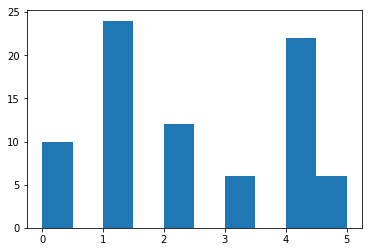

In [182]:
plt.hist(df_euclid_merge_6.Clusters)

In [183]:
df_euclid_merge_6.groupby(['Clusters','Industry']).size()

Clusters  Industry                                                      
0         Banks                                                             1
          Electronic Components                                             1
          Industrial Machinery/Components                                   1
          Life Insurance                                                    1
          Major Banks                                                       2
          Major Pharmaceuticals                                             1
          Metal Fabrications                                                1
          n/a                                                               2
1         Advertising                                                       1
          Beverages (Production/Distribution)                               1
          Broadcasting                                                      1
          Business Services                                          

In [184]:
df_euclid_merge_6.groupby(['Clusters','Sector']).size()

Clusters  Sector               
0         Basic Industries         1
          Capital Goods            1
          Finance                  4
          Health Care              1
          Technology               1
          n/a                      2
1         Basic Industries         2
          Consumer Non-Durables    2
          Consumer Services        8
          Energy                   1
          Finance                  2
          Miscellaneous            1
          Public Utilities         1
          Technology               3
          n/a                      4
2         Consumer Services        1
          Finance                  1
          Health Care              6
          Technology               3
          n/a                      1
3         Energy                   1
          Finance                  1
          Health Care              2
          Miscellaneous            1
          n/a                      1
4         Basic Industries         2
      